In [1]:
import os
import re

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from nltk.corpus import wordnet

SRC_PATH="parsed"

# Change the value to True if you want to see the heatmap for correlations
display_correlations = False
display_accuracy_measures = False

In [2]:
def load_housing_data(src=SRC_PATH):
    csv_path = os.path.join(src, "src.csv")
    return pd.read_csv(csv_path)

In [3]:
df = load_housing_data()
df.head()

Title  Links  Categories  Images  References  Length  \
0            Hammurabi   1103          45      44          97   15484   
1           Hatshepsut    755          49      18          97   33266   
2          Ramesses II    662          43      25         119   32507   
3      Cyrus the Great    515          61      32         213   47616   
4  Alexander the Great   1910          71      75         401   89053   

   Quality   Theme  
0      4.0  People  
1      3.0  People  
2      2.0  People  
3      2.0  People  
4      4.0  People

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       998 non-null    object 
 1   Links       998 non-null    int64  
 2   Categories  998 non-null    int64  
 3   Images      998 non-null    int64  
 4   References  998 non-null    int64  
 5   Length      998 non-null    int64  
 6   Quality     997 non-null    float64
 7   Theme       998 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 62.5+ KB


In [5]:
df["Theme"].value_counts()

Science                         210
Society and social sciences     146
People                          112
Geography                       106
Technology                       98
History                          83
Everyday life                    57
Philosophy and religion          55
Arts                             45
Mathematics                      45
Health, medicine and disease     41
Name: Theme, dtype: int64

In [6]:
df.describe()

Links  Categories      Images   References         Length  \
count   998.000000  998.000000  998.000000   998.000000     998.000000   
mean    859.871743   38.109218   41.362725   218.013026   50315.901804   
std     513.129578   25.571013   37.425723   181.221618   25837.048931   
min      99.000000    7.000000    2.000000     6.000000    7047.000000   
25%     477.000000   21.000000   21.000000    86.000000   30272.000000   
50%     733.000000   30.000000   31.000000   157.000000   46976.500000   
75%    1140.750000   44.000000   48.750000   297.750000   63421.500000   
max    3662.000000  153.000000  339.000000  1310.000000  165877.000000   

          Quality  
count  997.000000  
mean     2.749248  
std      0.959685  
min      1.000000  
25%      2.000000  
50%      3.000000  
75%      3.000000  
max      5.000000

In [7]:
if display_correlations:
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True)

In [8]:
# Alternative way of filtering
# df_filtered = df[df["Theme"] == "Arts"]

df_filtered_just_arts = df.query("Theme == 'Arts'")
df_filtered_just_arts.head()

Title  Links  Categories  Images  References  Length  Quality  \
301         The arts   1055          23      33          83   21772      2.0   
302              Art    519          30      36         256   57072      2.0   
303  Prehistoric art    849          12      46          80   50775      2.0   
304          Fashion   1548          31      26         104   54418      2.0   
305           Museum    441          29      30         131   44326      2.0   

    Theme  
301  Arts  
302  Arts  
303  Arts  
304  Arts  
305  Arts

In [9]:
categories = sorted(set(df['Theme']))

In [10]:
def corr_for_category(category):
    df_filtered = df.query(f"Theme == '{category}'")
    corr_within_category = df_filtered.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr_within_category, dtype=bool))
    ax[i].set_title(category)
    sns.heatmap(corr_within_category, mask=mask, annot=True, ax=ax[i])
if display_correlations:
    length = len(categories)
    fig, ax = plt.subplots(length,1, figsize=(6.4, 24))
    i = 0

    # plt.figure(figsize=(6.4, 24))
    for category in categories:
        corr_for_category(category)
        i+=1

    plt.tight_layout()

In [11]:
# Science subset w every attribute
df_science = df.query("Theme == 'Science'")
df_science.head()

Title  Links  Categories  Images  References  \
645                        Science    661          32      29         416   
646              Scientific method    769          17      21         151   
647                    Measurement    304          16      10          38   
648  International System of Units    681          31      19         195   
649                         Nature    746          22      59         207   

     Length  Quality    Theme  
645   45955      3.0  Science  
646   73762      3.0  Science  
647   20674      2.0  Science  
648   58608      4.0  Science  
649   37866      4.0  Science

In [12]:
df_arts_without_quality = df.query("Theme == 'Arts'")
df_arts_without_quality.drop(columns=["Quality"])
df_arts_without_quality.head()

Title  Links  Categories  Images  References  Length  Quality  \
301         The arts   1055          23      33          83   21772      2.0   
302              Art    519          30      36         256   57072      2.0   
303  Prehistoric art    849          12      46          80   50775      2.0   
304          Fashion   1548          31      26         104   54418      2.0   
305           Museum    441          29      30         131   44326      2.0   

    Theme  
301  Arts  
302  Arts  
303  Arts  
304  Arts  
305  Arts

In [13]:
df_without_quality = df.drop(columns=["Quality"])
df_without_quality.head()

Title  Links  Categories  Images  References  Length   Theme
0            Hammurabi   1103          45      44          97   15484  People
1           Hatshepsut    755          49      18          97   33266  People
2          Ramesses II    662          43      25         119   32507  People
3      Cyrus the Great    515          61      32         213   47616  People
4  Alexander the Great   1910          71      75         401   89053  People

In [14]:
def corr_for_old_and_new_category(category):
    df_filtered = df.query(f"Theme == '{category}'")
    corr_within_category_for_df = df_filtered.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr_within_category_for_df, dtype=bool))
    ax[i,0].set_title(category)
    sns.heatmap(corr_within_category_for_df, mask=mask, annot=True, ax=ax[i,0])

    df_filtered = df_without_quality.query(f"Theme == '{category}'")
    corr_within_category_for_df_filtered = df_filtered.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr_within_category_for_df_filtered, dtype=bool))
    ax[i,1].set_title("without Quality")
    sns.heatmap(corr_within_category_for_df_filtered, mask=mask, annot=True, ax=ax[i,1])
if display_correlations:
    length = len(categories)
    fig, ax = plt.subplots(length,2, figsize=(8, 24))
    i = 0

    for category in categories:
        corr_for_old_and_new_category(category)
        i+=1

    plt.tight_layout()

# Correlation with non-numerical values

In [15]:
df[df.isna().any(axis=1)]

Title  Links  Categories  Images  References  Length  Quality    Theme
846  Wind    563          11      23         277   41140      NaN  Science

In [16]:
# Drop missing values
df = df.dropna()

In [17]:
df[df.isna().any(axis=1)]

Empty DataFrame
Columns: [Title, Links, Categories, Images, References, Length, Quality, Theme]
Index: []

In [18]:
df_all_numerical = df.copy()
df_all_numerical.head()

Title  Links  Categories  Images  References  Length  \
0            Hammurabi   1103          45      44          97   15484   
1           Hatshepsut    755          49      18          97   33266   
2          Ramesses II    662          43      25         119   32507   
3      Cyrus the Great    515          61      32         213   47616   
4  Alexander the Great   1910          71      75         401   89053   

   Quality   Theme  
0      4.0  People  
1      3.0  People  
2      2.0  People  
3      2.0  People  
4      4.0  People

In [19]:
i = 0
mapping = {}
for category in categories:
    mapping.update({category: i})
    i+=1

df_all_numerical["T.Numerical"] = df_all_numerical.Theme.map(mapping)
df_all_numerical.head()

Title  Links  Categories  Images  References  Length  \
0            Hammurabi   1103          45      44          97   15484   
1           Hatshepsut    755          49      18          97   33266   
2          Ramesses II    662          43      25         119   32507   
3      Cyrus the Great    515          61      32         213   47616   
4  Alexander the Great   1910          71      75         401   89053   

   Quality   Theme  T.Numerical  
0      4.0  People            6  
1      3.0  People            6  
2      2.0  People            6  
3      2.0  People            6  
4      4.0  People            6

In [20]:
df_all_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 997
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        997 non-null    object 
 1   Links        997 non-null    int64  
 2   Categories   997 non-null    int64  
 3   Images       997 non-null    int64  
 4   References   997 non-null    int64  
 5   Length       997 non-null    int64  
 6   Quality      997 non-null    float64
 7   Theme        997 non-null    object 
 8   T.Numerical  997 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 77.9+ KB


In [21]:
if display_correlations:
    corr_matrix = df_all_numerical.corr()
    sns.heatmap(corr_matrix, annot=True)

In [22]:
def corr_for_category_all_numerical(category):
    df_filtered = df_all_numerical.query(f"Theme == '{category}'")
    corr_within_category = df_filtered.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr_within_category, dtype=bool))
    ax[i].set_title(category)
    sns.heatmap(corr_within_category, mask=mask, annot=True, ax=ax[i])

if display_correlations:
    length = len(categories)
    fig, ax = plt.subplots(length,1, figsize=(6.4, 24))
    i = 0

    # plt.figure(figsize=(6.4, 24))
    for category in categories:
        corr_for_category_all_numerical(category)
        i+=1

    plt.tight_layout()

# Test and Train

Splitting the data before normalization

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
attributes = ["Links", "Categories", "Images", "References", "Length", "Quality"]

X = df[attributes]
Y = df["Theme"]
classes=['Science', 'Society and social sciences', 'People', 'Geography', 'Technology', 'History', 'Everyday life', 'Philosophy and religion', 'Arts', 'Mathematics', 'Health, medicine and disease']
Yb = label_binarize(Y, classes=['Science', 'Society and social sciences', 'People', 'Geography', 'Technology', 'History', 'Everyday life', 'Philosophy and religion', 'Arts', 'Mathematics', 'Health, medicine and disease'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

X_trainb, X_testb, Y_trainb, Y_testb = train_test_split(X, Yb, test_size=0.2)

n_classes = Yb.shape[1]


print(Y_trainb)

[[0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


Check for NaN

In [24]:
X_train[X_train.isna().any(axis=1)]

Empty DataFrame
Columns: [Links, Categories, Images, References, Length, Quality]
Index: []

# Standardization

After the test split

In [25]:
X_train.head()

Links  Categories  Images  References  Length  Quality
746   1328          38      50        1092   59322      4.0
987    279          10      38          58   24348      2.0
993    309          11      23           6   24209      2.0
425    643          41      48         342   49930      3.0
400    961          11      14          64   21294      3.0

### Z-score normalization or standardization
Step 1: Standardize the train set

In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = pd.DataFrame(sc.fit_transform(X_train),columns = X_train.columns)
X_train_std.head()

Links  Categories    Images  References    Length   Quality
0  0.900316    0.015129  0.220185    4.773394  0.332723  1.301961
1 -1.121608   -1.099101 -0.092906   -0.868858 -0.983425 -0.783794
2 -1.063784   -1.059307 -0.484269   -1.152608 -0.988656 -0.783794
3 -0.420006    0.134510  0.168003    0.680851 -0.020719  0.259084
4  0.192932   -1.059307 -0.719087   -0.836118 -1.098354  0.259084

Step 2: Standardize the test set with the train set's parameters.

In [27]:
X_test.head()

Links  Categories  Images  References  Length  Quality
880    437          26      12         124   35471      3.0
358    819          27      16         354  104137      3.0
123    519           7      43         103   52205      2.0
91     464          81      33         143   30136      3.0
0     1103          45      44          97   15484      4.0

In [28]:
X_test_std = pd.DataFrame(sc.transform(X_test),columns = X_test.columns)
X_test_std.head()

Links  Categories    Images  References    Length   Quality
0 -0.817067   -0.462398 -0.771268   -0.508715 -0.564842  0.259084
1 -0.080770   -0.422604 -0.666905    0.746332  2.019209  0.259084
2 -0.659013   -1.218483  0.037549   -0.623306  0.064895 -0.783794
3 -0.765025    1.726267 -0.223360   -0.405037 -0.765610  0.259084
4  0.466633    0.293686  0.063639   -0.656046 -1.316997  1.301961

### Min-max scaling or normalization
[Doc](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
Step 1: Normalize the train set

In [29]:
X_train.head()

Links  Categories  Images  References  Length  Quality
746   1328          38      50        1092   59322      4.0
987    279          10      38          58   24348      2.0
993    309          11      23           6   24209      2.0
425    643          41      48         342   49930      3.0
400    961          11      14          64   21294      3.0

In [30]:
# Normalized to a min value of 0 and max value of 1
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train_nrml = pd.DataFrame(min_max_scaler.fit_transform(X_train),columns = X_train.columns)
X_train_nrml.head()

Links  Categories    Images  References    Length  Quality
0  0.344934    0.201389  0.142433    0.832822  0.329125     0.75
1  0.050519    0.006944  0.106825    0.039877  0.108928     0.25
2  0.058939    0.013889  0.062315    0.000000  0.108053     0.25
3  0.152680    0.222222  0.136499    0.257669  0.269993     0.50
4  0.241931    0.013889  0.035608    0.044479  0.089700     0.50

Step 2: Normalize the test set with the train set’s parameters.

In [31]:
X_test.head()

Links  Categories  Images  References  Length  Quality
880    437          26      12         124   35471      3.0
358    819          27      16         354  104137      3.0
123    519           7      43         103   52205      2.0
91     464          81      33         143   30136      3.0
0     1103          45      44          97   15484      4.0

In [32]:
X_test_nrml = pd.DataFrame(min_max_scaler.fit_transform(X_test),columns = X_test.columns)
X_test_nrml.head()

Links  Categories    Images  References    Length  Quality
0  0.134468    0.135714  0.034749    0.116461  0.183187     0.50
1  0.297021    0.142857  0.050193    0.374020  0.723767     0.50
2  0.169362    0.000000  0.154440    0.092945  0.314927     0.25
3  0.145957    0.528571  0.115830    0.137738  0.141187     0.50
4  0.417872    0.271429  0.158301    0.086226  0.025838     0.75

# Support Vector Machine

[SVMDocumentation](https://scikit-learn.org/stable/modules/svm.html)

## Normalized

In [33]:
from sklearn.svm import SVC

svm_nrml = SVC(kernel="linear")
svm_nrml.fit(X_train_nrml, Y_train)

SVC(kernel='linear')

In [34]:
svm_nrml.score(X_train_nrml, Y_train)

0.44165621079046424

In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_nrml, X_train_nrml, Y_train, cv=5, scoring="accuracy")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.41 accuracy with a standard deviation of 0.02


In [36]:
svm_nrml.score(X_test_nrml, Y_test)

0.43

### Confusion matrix
[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_pred_nrml = svm_nrml.predict(X_test_nrml)
y_pred_cross = cross_val_predict(svm_nrml, X_test_nrml, Y_test, cv=5)
cmn = confusion_matrix(Y_test, y_pred_nrml)
cmc = confusion_matrix(Y_test, y_pred_cross)

# Include the text
# Problems w class imbalance

[Display Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay)

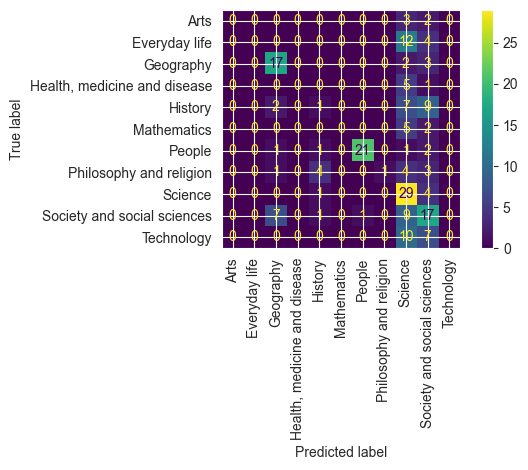

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cmn, display_labels=svm_nrml.classes_)
disp.plot(xticks_rotation=90)

plt.tight_layout()

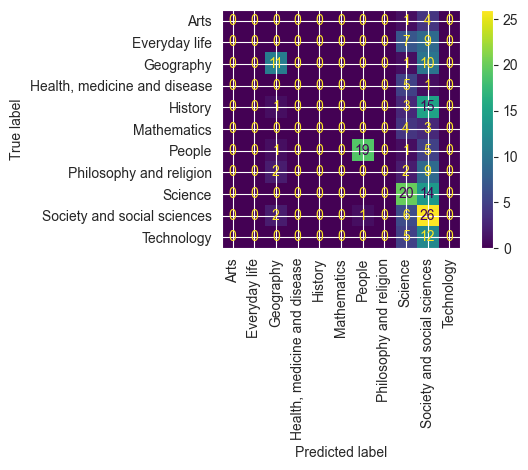

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cmc, display_labels=svm_nrml.classes_)
disp.plot(xticks_rotation=90)

plt.tight_layout()

## Standardized

In [40]:
svm_std = SVC(kernel="linear")
svm_std.fit(X_train_std, Y_train)

SVC(kernel='linear')

In [41]:
svm_std.score(X_train_std, Y_train)

0.4780426599749059

In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_std, X_train_std, Y_train, cv=5, scoring="accuracy")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.44 accuracy with a standard deviation of 0.03


In [43]:
svm_std.score(X_test_std, Y_test)

0.46

### Confusion matrix
[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)

In [44]:
y_pred_std = svm_std.predict(X_test_std)
y_pred_cross = cross_val_predict(svm_std, X_test_std, Y_test, cv=5)
cmn = confusion_matrix(Y_test, y_pred_std)
cmc = confusion_matrix(Y_test, y_pred_cross)


[Display Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay)

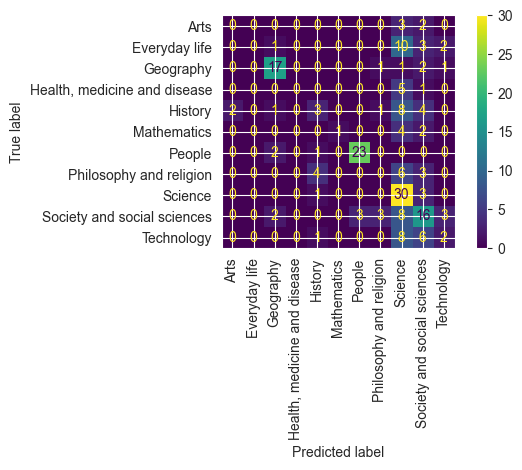

In [45]:
disp = ConfusionMatrixDisplay(confusion_matrix=cmn, display_labels=svm_std.classes_)
disp.plot(xticks_rotation=90)

plt.tight_layout()

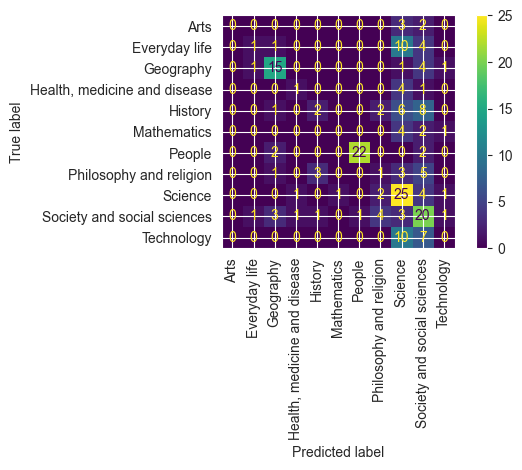

In [46]:
disp = ConfusionMatrixDisplay(confusion_matrix=cmc, display_labels=svm_std.classes_)
disp.plot(xticks_rotation=90)

plt.tight_layout()

In [47]:
from sklearn.metrics import precision_score, recall_score

precision_score(Y_test, y_pred_cross, average='micro')

0.435

In [48]:
recall_score(Y_test, y_pred_cross, average='micro')

0.435

In [49]:
from sklearn.metrics import f1_score

f1_score(Y_test, y_pred_cross, average='micro')

0.435

Precision/Recall Trade-off

In [50]:
y_scores = svm_std.decision_function(X)

In [51]:
# threshold = 0
# y_some_digit_pred = (y_scores > threshold)

In [52]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)

In [53]:
if display_accuracy_measures:
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn import svm, datasets


    classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                     random_state=0))
    y_scoresb = classifier.fit(X_trainb, Y_trainb).decision_function(X_testb)



Roc curves


In [54]:
if display_accuracy_measures:
    import matplotlib.pyplot as plt
    from itertools import cycle
    from sklearn.metrics import roc_curve, auc
    from sklearn.metrics import precision_recall_curve

    lw = 2
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    precision = dict()
    recall = dict()
    threshold = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_testb[:, i], y_scoresb[:, i])
        precision[i], recall[i], threshold[i] = precision_recall_curve(Y_testb[:, i], y_scoresb[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    colors = cycle(['blue', 'red', 'green', 'yellow', 'orange', 'purple', 'pink', 'black', 'white','pink', 'brown'])

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(classes[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()

In [55]:
if display_accuracy_measures:
    for i, color in zip(range(n_classes), colors):
        plt.plot(threshold[i], precision[i][:-1], color=color, lw=lw,
                 label='Precision of class {0}'
                 ''.format(classes[i]))
        plt.plot(threshold[i], recall[i][:-1], color=color, linestyle='dashed', lw=lw,
                 label='Recall of class {0}'
                   ''.format(classes[i]))

    plt.xlabel('Threshold')
    plt.title('Precision and recall evolution with threshold')
    plt.legend(loc="lower right", prop={'size': 5})
    plt.show()

In [56]:
if display_accuracy_measures:
    for i, color in zip(range(n_classes), colors):
        plt.plot(precision[i], recall[i], color=color, lw=lw,
                 label='Precision vs recall of class {0}'
                 ''.format(classes[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision vs recall')
    plt.legend(loc="lower right", prop={'size': 5})
    plt.show()

In [57]:
if display_accuracy_measures:
    from sklearn.ensemble import RandomForestClassifier
    forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

    y_scores_forest = cross_val_predict(forest_clf, X_testb, Y_testb, cv=5,
                                        method="predict_proba")

In [58]:
if display_accuracy_measures:
    fpr_forest = dict()
    tpr_forest = dict()
    thresholds_forest = dict()

    for i in range(n_classes):
        fpr_forest[i], tpr_forest[i], thresholds_forest[i] = roc_curve(Y_testb[:, i], y_scores_forest[i][:, 1])



In [59]:
if display_accuracy_measures:
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr_forest[i], tpr_forest[i], color=color, lw=lw,
                 label='ROC forest curve of class {0} (area = {1:0.2f})'
                 ''.format(classes[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data with forest classifier')
    plt.legend(loc="lower right", prop={'size': 5})
    plt.show()

In [60]:
if display_accuracy_measures:
    y_pred_std = svm_std.predict(X_test_std)
    y_pred_cross = cross_val_predict(svm_std, X_test_std, Y_test, cv=5)
    cmn = confusion_matrix(Y_test, y_pred_std)
    cmc = confusion_matrix(Y_test, y_pred_cross)


[Display Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay)

In [61]:
if display_accuracy_measures:
    disp = ConfusionMatrixDisplay(confusion_matrix=cmn, display_labels=svm_std.classes_)
    disp.plot(xticks_rotation=90)

    plt.tight_layout()

In [62]:
if display_accuracy_measures:
    disp = ConfusionMatrixDisplay(confusion_matrix=cmc, display_labels=svm_std.classes_)
    disp.plot(xticks_rotation=90)

    plt.tight_layout()

In [63]:
if display_accuracy_measures:
    from sklearn.metrics import precision_score, recall_score

    precision_score(Y_test, y_pred_cross, average='micro')

In [64]:
if display_accuracy_measures:
    recall_score(Y_test, y_pred_cross, average='micro')

In [65]:
if display_accuracy_measures:
    from sklearn.metrics import f1_score

    f1_score(Y_test, y_pred_cross, average='micro')

Precision/Recall Trade-off

In [66]:
if display_accuracy_measures:
    y_scores = svm_std.decision_function(X)

In [67]:
# threshold = 0
# y_some_digit_pred = (y_scores > threshold)

In [68]:
if display_accuracy_measures:
    threshold = 8000
    y_some_digit_pred = (y_scores > threshold)

In [69]:
if display_accuracy_measures:
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn import svm, datasets


    classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                     random_state=0))
    y_scoresb = classifier.fit(X_trainb, Y_trainb).decision_function(X_testb)



Roc curves


In [70]:
if display_accuracy_measures:
    import matplotlib.pyplot as plt
    from itertools import cycle
    from sklearn.metrics import roc_curve, auc
    from sklearn.metrics import precision_recall_curve

    lw = 2
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    precision = dict()
    recall = dict()
    threshold = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_testb[:, i], y_scoresb[:, i])
        precision[i], recall[i], threshold[i] = precision_recall_curve(Y_testb[:, i], y_scoresb[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    colors = cycle(['blue', 'red', 'green', 'yellow', 'orange', 'purple', 'pink', 'black', 'white','pink', 'brown'])

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(classes[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()

In [71]:
if display_accuracy_measures:
    for i, color in zip(range(n_classes), colors):
        plt.plot(threshold[i], precision[i][:-1], color=color, lw=lw,
                 label='Precision of class {0}'
                 ''.format(classes[i]))
        plt.plot(threshold[i], recall[i][:-1], color=color, linestyle='dashed', lw=lw,
                 label='Recall of class {0}'
                   ''.format(classes[i]))

    plt.xlabel('Threshold')
    plt.title('Precision and recall evolution with threshold')
    plt.legend(loc="lower right", prop={'size': 5})
    plt.show()

In [72]:
if display_accuracy_measures:
    for i, color in zip(range(n_classes), colors):
        plt.plot(precision[i], recall[i], color=color, lw=lw,
                 label='Precision vs recall of class {0}'
                 ''.format(classes[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision vs recall')
    plt.legend(loc="lower right", prop={'size': 5})
    plt.show()

In [73]:
if display_accuracy_measures:
    from sklearn.ensemble import RandomForestClassifier
    forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

    y_scores_forest = cross_val_predict(forest_clf, X_testb, Y_testb, cv=5,
                                        method="predict_proba")

In [74]:
if display_accuracy_measures:

    fpr_forest = dict()
    tpr_forest = dict()
    thresholds_forest = dict()

    for i in range(n_classes):
        fpr_forest[i], tpr_forest[i], thresholds_forest[i] = roc_curve(Y_testb[:, i], y_scores_forest[i][:, 1])



In [75]:
if display_accuracy_measures:
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr_forest[i], tpr_forest[i], color=color, lw=lw,
                 label='ROC forest curve of class {0} (area = {1:0.2f})'
                 ''.format(classes[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data with forest classifier')
    plt.legend(loc="lower right", prop={'size': 5})
    plt.show()

In [76]:
if display_accuracy_measures:
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(svm_std, X_train_std, Y_train, cv=5, scoring="accuracy")
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [77]:
if display_accuracy_measures:
    svm_std.score(X_test_std, Y_test)

### Confusion matrix
[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)

In [78]:
if display_accuracy_measures:
    y_pred_std = svm_std.predict(X_test_std)
    y_pred_cross = cross_val_predict(svm_std, X_test_std, Y_test, cv=5)
    cmn = confusion_matrix(Y_test, y_pred_std)
    cmc = confusion_matrix(Y_test, y_pred_cross)


[Display Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay)

In [79]:
if display_accuracy_measures:
    disp = ConfusionMatrixDisplay(confusion_matrix=cmn, display_labels=svm_std.classes_)
    disp.plot(xticks_rotation=90)

    plt.tight_layout()

In [80]:
if display_accuracy_measures:
    disp = ConfusionMatrixDisplay(confusion_matrix=cmc, display_labels=svm_std.classes_)
    disp.plot(xticks_rotation=90)

    plt.tight_layout()

In [81]:
if display_accuracy_measures:
    from sklearn.metrics import precision_score, recall_score

    precision_score(Y_test, y_pred_cross, average='micro')

In [82]:
if display_accuracy_measures:
    recall_score(Y_test, y_pred_cross, average='micro')

In [83]:
if display_accuracy_measures:
    from sklearn.metrics import f1_score

    f1_score(Y_test, y_pred_cross, average='micro')

Precision/Recall Trade-off

In [84]:
if display_accuracy_measures:
    y_scores = svm_std.decision_function(X)

In [85]:
# threshold = 0
# y_some_digit_pred = (y_scores > threshold)

In [86]:
if display_accuracy_measures:
    threshold = 8000
    y_some_digit_pred = (y_scores > threshold)

In [87]:
if display_accuracy_measures:
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn import svm, datasets


    classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                     random_state=0))
    y_scoresb = classifier.fit(X_trainb, Y_trainb).decision_function(X_testb)



Roc curves


In [88]:
if display_accuracy_measures:
    import matplotlib.pyplot as plt
    from itertools import cycle
    from sklearn.metrics import roc_curve, auc
    from sklearn.metrics import precision_recall_curve

    lw = 2
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    precision = dict()
    recall = dict()
    threshold = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_testb[:, i], y_scoresb[:, i])
        precision[i], recall[i], threshold[i] = precision_recall_curve(Y_testb[:, i], y_scoresb[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    colors = cycle(['blue', 'red', 'green', 'yellow', 'orange', 'purple', 'pink', 'black', 'white','pink', 'brown'])

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(classes[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()

In [89]:
if display_accuracy_measures:
    for i, color in zip(range(n_classes), colors):
        plt.plot(threshold[i], precision[i][:-1], color=color, lw=lw,
                 label='Precision of class {0}'
                 ''.format(classes[i]))
        plt.plot(threshold[i], recall[i][:-1], color=color, linestyle='dashed', lw=lw,
                 label='Recall of class {0}'
                   ''.format(classes[i]))

    plt.xlabel('Threshold')
    plt.title('Precision and recall evolution with threshold')
    plt.legend(loc="lower right", prop={'size': 5})
    plt.show()

In [90]:
if display_accuracy_measures:
    for i, color in zip(range(n_classes), colors):
        plt.plot(precision[i], recall[i], color=color, lw=lw,
                 label='Precision vs recall of class {0}'
                 ''.format(classes[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision vs recall')
    plt.legend(loc="lower right", prop={'size': 5})
    plt.show()

In [91]:
if display_accuracy_measures:
    from sklearn.ensemble import RandomForestClassifier
    forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

    y_scores_forest = cross_val_predict(forest_clf, X_testb, Y_testb, cv=5,
                                        method="predict_proba")

In [92]:
if display_accuracy_measures:

    fpr_forest = dict()
    tpr_forest = dict()
    thresholds_forest = dict()

    for i in range(n_classes):
        fpr_forest[i], tpr_forest[i], thresholds_forest[i] = roc_curve(Y_testb[:, i], y_scores_forest[i][:, 1])



In [93]:
if display_accuracy_measures:
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr_forest[i], tpr_forest[i], color=color, lw=lw,
                 label='ROC forest curve of class {0} (area = {1:0.2f})'
                 ''.format(classes[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data with forest classifier')
    plt.legend(loc="lower right", prop={'size': 5})
    plt.show()

In [94]:
if display_accuracy_measures:
    y_pred_std = svm_std.predict(X_test_std)
    y_pred_cross = cross_val_predict(svm_std, X_test_std, Y_test, cv=5)
    cmn = confusion_matrix(Y_test, y_pred_std)
    cmc = confusion_matrix(Y_test, y_pred_cross)


[Display Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay)

In [95]:
if display_accuracy_measures:
    disp = ConfusionMatrixDisplay(confusion_matrix=cmn, display_labels=svm_std.classes_)
    disp.plot(xticks_rotation=90)

    plt.tight_layout()

In [96]:
if display_accuracy_measures:
    disp = ConfusionMatrixDisplay(confusion_matrix=cmc, display_labels=svm_std.classes_)
    disp.plot(xticks_rotation=90)

    plt.tight_layout()

In [97]:
if display_accuracy_measures:
    from sklearn.metrics import precision_score, recall_score

    precision_score(Y_test, y_pred_cross, average='micro')

In [98]:
if display_accuracy_measures:
    recall_score(Y_test, y_pred_cross, average='micro')

In [99]:
if display_accuracy_measures:
    from sklearn.metrics import f1_score

    f1_score(Y_test, y_pred_cross, average='micro')

Precision/Recall Trade-off

In [100]:
if display_accuracy_measures:
   y_scores = svm_std.decision_function(X)

In [101]:
    # threshold = 0
    # y_some_digit_pred = (y_scores > threshold)

In [102]:
if display_accuracy_measures:
    threshold = 8000
    y_some_digit_pred = (y_scores > threshold)

In [103]:
if display_accuracy_measures:
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn import svm, datasets


    classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                     random_state=0))
    y_scoresb = classifier.fit(X_trainb, Y_trainb).decision_function(X_testb)



Roc curves


In [104]:
if display_accuracy_measures:
    import matplotlib.pyplot as plt
    from itertools import cycle
    from sklearn.metrics import roc_curve, auc
    from sklearn.metrics import precision_recall_curve

    if display_accuracy_measures:
        lw = 2
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        precision = dict()
        recall = dict()
        threshold = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(Y_testb[:, i], y_scoresb[:, i])
            precision[i], recall[i], threshold[i] = precision_recall_curve(Y_testb[:, i], y_scoresb[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        colors = cycle(['blue', 'red', 'green', 'yellow', 'orange', 'purple', 'pink', 'black', 'white','pink', 'brown'])

        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                     label='ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(classes[i], roc_auc[i]))
        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([-0.05, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic for multi-class data')
        plt.legend(loc="lower right")
        plt.show()

In [105]:
if display_accuracy_measures:
    for i, color in zip(range(n_classes), colors):
        plt.plot(threshold[i], precision[i][:-1], color=color, lw=lw,
                 label='Precision of class {0}'
                 ''.format(classes[i]))
        plt.plot(threshold[i], recall[i][:-1], color=color, linestyle='dashed', lw=lw,
                 label='Recall of class {0}'
                   ''.format(classes[i]))

    plt.xlabel('Threshold')
    plt.title('Precision and recall evolution with threshold')
    plt.legend(loc="lower right", prop={'size': 5})
    plt.show()

In [106]:
if display_accuracy_measures:
    for i, color in zip(range(n_classes), colors):
        plt.plot(precision[i], recall[i], color=color, lw=lw,
                 label='Precision vs recall of class {0}'
                 ''.format(classes[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision vs recall')
    plt.legend(loc="lower right", prop={'size': 5})
    plt.show()

In [107]:
if display_accuracy_measures:
    from sklearn.ensemble import RandomForestClassifier
    forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

    y_scores_forest = cross_val_predict(forest_clf, X_testb, Y_testb, cv=5,
                                        method="predict_proba")

In [108]:
if display_accuracy_measures:
    fpr_forest = dict()
    tpr_forest = dict()
    thresholds_forest = dict()

    for i in range(n_classes):
        fpr_forest[i], tpr_forest[i], thresholds_forest[i] = roc_curve(Y_testb[:, i], y_scores_forest[i][:, 1])



In [109]:
if display_accuracy_measures:
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr_forest[i], tpr_forest[i], color=color, lw=lw,
                 label='ROC forest curve of class {0} (area = {1:0.2f})'
                 ''.format(classes[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data with forest classifier')
    plt.legend(loc="lower right", prop={'size': 5})
    plt.show()

# Word Vector Creation

In [110]:
# Importing the necessary functions
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer
import re, string


def lemmatise(text):
    """Returns lemmatised tokens from the text."""
    """Based on our lab3_preprocessing.ipynb code."""
    text = text.lower().strip()
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)

    # We will use a tokenizer from the NLTK library
    filtered_sentence = []
    # Stop word lists can be adjusted for your problem
    stop_words = nltk.corpus.stopwords.words('english')

    # Tokenize the sentence
    words = word_tokenize(text)
    for w in words:
        if w not in stop_words:
            filtered_sentence.append(w)
    text = " ".join(filtered_sentence)

    # Initialize the lemmatizer
    wl = WordNetLemmatizer()

    # This is a helper function to map NTLK position tags
    # Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
    def get_wordnet_pos(tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN

    lemmatized_sentence = []
    # Tokenize the sentence
    words = word_tokenize(text)
    # Get position tags
    word_pos_tags = nltk.pos_tag(words)
    # Map the position tag and lemmatize the word/token
    for idx, tag in enumerate(word_pos_tags):
        lemmatized_sentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))

    return lemmatized_sentence

In [111]:
list_of_df_all_numerical = df_all_numerical.values.tolist()
dict_of_df_all_numerical = {}
for article in list_of_df_all_numerical:
    dict_of_df_all_numerical[article[0]] = article[1:]
dict_of_df_all_numerical

{'Hammurabi': [1103, 45, 44, 97, 15484, 4.0, 'People', 6],
 'Hatshepsut': [755, 49, 18, 97, 33266, 3.0, 'People', 6],
 'Ramesses II': [662, 43, 25, 119, 32507, 2.0, 'People', 6],
 'Cyrus the Great': [515, 61, 32, 213, 47616, 2.0, 'People', 6],
 'Alexander the Great': [1910, 71, 75, 401, 89053, 4.0, 'People', 6],
 'Ashoka': [780, 46, 57, 149, 84837, 3.0, 'People', 6],
 'Qin Shi Huang': [400, 57, 23, 129, 39510, 3.0, 'People', 6],
 'Julius Caesar': [840, 93, 41, 358, 53213, 3.0, 'People', 6],
 'Augustus': [867, 65, 48, 145, 84168, 5.0, 'People', 6],
 'Charlemagne': [1099, 108, 58, 183, 83252, 2.0, 'People', 6],
 'Genghis Khan': [611, 82, 38, 173, 56848, 3.0, 'People', 6],
 'Mansa Musa': [133, 33, 10, 67, 17536, 2.0, 'People', 6],
 'Joan of Arc': [643, 84, 32, 937, 45538, 5.0, 'People', 6],
 'Suleiman the Magnificent': [403, 48, 31, 91, 37090, 3.0, 'People', 6],
 'Akbar': [646, 61, 32, 167, 91274, 3.0, 'People', 6],
 'Elizabeth I': [615, 81, 42, 138, 57770, 5.0, 'People', 6],
 'Catherine 

Create a dictionary of articles. Title as key, value contains the category and summary of lemmanized words

In [112]:
from wikipedia_page_data_fetcher import get_article_data_from_file
import os

# assign directory
directory = 'articles'

LIST_OF_ARTICLES = [x.removesuffix(".txt") for x in os.listdir(directory)]
all_article_data = {name: get_article_data_from_file(name, use_lemmatised_version = False) for name in LIST_OF_ARTICLES}

word_list = []
article_list = {}

for filename in LIST_OF_ARTICLES:
    summary = lemmatise(all_article_data[filename]["Summary"])
    try:
        category = dict_of_df_all_numerical[filename][6]
    except KeyError:
        continue
        # print(filename)
        # Files skipped:
            # Acid-base reaction
            # NiccolĽ Machiavelli
            # SĂo Paulo
            # Wind
    article_list[filename] = [category, summary]
    word_list.append(summary)


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Peter\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Peter\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Peter\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Peter\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [113]:
article_list

{'0': ['Mathematics',
  ['0',
   'zero',
   'number',
   'numerical',
   'digit',
   'use',
   'represent',
   'number',
   'numeral',
   'fulfill',
   'central',
   'role',
   'mathematics',
   'additive',
   'identity',
   'integer',
   'real',
   'number',
   'many',
   'algebraic',
   'structure',
   'digit',
   '0',
   'use',
   'placeholder',
   'place',
   'value',
   'system',
   'name',
   'number',
   '0',
   'english',
   'include',
   'zero',
   'nought',
   'uk',
   'naught',
   'u',
   'nil',
   'or—in',
   'context',
   'least',
   'one',
   'adjacent',
   'digit',
   'distinguishes',
   'letter',
   '—oh',
   'informal',
   'slang',
   'term',
   'zero',
   'include',
   'zilch',
   'zip',
   'ought',
   'aught',
   'well',
   'cipher',
   'also',
   'use',
   'historically']],
 'Abiogenesis': ['Science',
  ['biology',
   'abiogenesis',
   '‘',
   '’',
   'greek',
   'bios',
   '‘',
   'life',
   '’',
   'genesis',
   'origin',
   'origin',
   'life',
   'natural',
   '

In [114]:
# Flatten the word list
import functools
import operator
word_list = functools.reduce(operator.concat, word_list)

In [115]:
from collections import Counter

# import matlab.mode
# [my_value,my_frequency]= mode(word_list)
# Counter(word_list).most_common()

freq = Counter(word_list)
freq = sorted(freq, key=freq.get, reverse=True)
freq

['use',
 'include',
 'also',
 'world',
 'century',
 'one',
 'form',
 'many',
 'state',
 'large',
 'system',
 'human',
 'may',
 'first',
 'country',
 'know',
 'call',
 'time',
 'number',
 'early',
 'language',
 'year',
 'city',
 'modern',
 'often',
 'empire',
 'term',
 'become',
 'two',
 'make',
 'area',
 'million',
 'war',
 'people',
 'part',
 'new',
 'work',
 'well',
 'study',
 'earth',
 'age',
 'power',
 'period',
 'history',
 'high',
 'culture',
 'lead',
 'great',
 'life',
 'social',
 'begin',
 '1',
 'develop',
 'science',
 'development',
 'different',
 'region',
 'process',
 'europe',
 'group',
 'population',
 'natural',
 'water',
 'east',
 'since',
 'energy',
 'consider',
 'political',
 'asia',
 'around',
 'ancient',
 'western',
 '000',
 'european',
 'theory',
 'art',
 'cause',
 'south',
 'type',
 'write',
 'major',
 'change',
 'specie',
 'animal',
 'body',
 'result',
 'base',
 'united',
 'various',
 'chemical',
 'within',
 'example',
 'greek',
 'follow',
 'force',
 'field',
 'com

In [116]:
# Vocabulary of the top 5000 words
vocabulary = freq[:5000]
vocabulary

['use',
 'include',
 'also',
 'world',
 'century',
 'one',
 'form',
 'many',
 'state',
 'large',
 'system',
 'human',
 'may',
 'first',
 'country',
 'know',
 'call',
 'time',
 'number',
 'early',
 'language',
 'year',
 'city',
 'modern',
 'often',
 'empire',
 'term',
 'become',
 'two',
 'make',
 'area',
 'million',
 'war',
 'people',
 'part',
 'new',
 'work',
 'well',
 'study',
 'earth',
 'age',
 'power',
 'period',
 'history',
 'high',
 'culture',
 'lead',
 'great',
 'life',
 'social',
 'begin',
 '1',
 'develop',
 'science',
 'development',
 'different',
 'region',
 'process',
 'europe',
 'group',
 'population',
 'natural',
 'water',
 'east',
 'since',
 'energy',
 'consider',
 'political',
 'asia',
 'around',
 'ancient',
 'western',
 '000',
 'european',
 'theory',
 'art',
 'cause',
 'south',
 'type',
 'write',
 'major',
 'change',
 'specie',
 'animal',
 'body',
 'result',
 'base',
 'united',
 'various',
 'chemical',
 'within',
 'example',
 'greek',
 'follow',
 'force',
 'field',
 'com

In [117]:
# from gensim.models.word2vec import Word2Vec
#
# model = Word2Vec(freq)

In [118]:
# sample_summary = article_list["Aircraft"][1].copy()
#
# aircraft_feature_vector = []
# for word in vocabulary:
#     relative_word_occurrence = sample_summary.count(word)/len(sample_summary)
#     aircraft_feature_vector.append(relative_word_occurrence)
# aircraft_feature_vector

In [119]:
# Importing numpy to store the vectors as numpy array
import numpy

def get_feature_vector_for_article(words_in_article):
    feature_vector= []
    for word in vocabulary:
        relative_word_occurrence = words_in_article.count(word) / len(words_in_article)
        feature_vector.append(relative_word_occurrence)
    return feature_vector

for article in article_list:
    feature_vector = get_feature_vector_for_article(article_list[article][1])
    feature_vector = numpy.array(feature_vector)
    article_list[article].insert(1, feature_vector)

Print name of the article if the Feature Vector is not 5000 (it shouldn't print any names)

In [120]:
for k,v in article_list.items():
    if len(v[1]) != 5000:
        print(k)

In [121]:
df_vector = pd.DataFrame.from_dict(article_list, orient='index', columns=['Theme', 'FeatureVector', 'WordVector'])
df_vector.head()

Theme  \
0                                Mathematics   
Abiogenesis                          Science   
Abortion         Society and social sciences   
Abraham Lincoln                       People   
Abraham                               People   

                                                     FeatureVector  \
0                [0.04838709677419355, 0.03225806451612903, 0.0...   
Abiogenesis      [0.003003003003003003, 0.003003003003003003, 0...   
Abortion         [0.01282051282051282, 0.003205128205128205, 0....   
Abraham Lincoln  [0.0, 0.0030581039755351682, 0.006116207951070...   
Abraham          [0.0, 0.005681818181818182, 0.0056818181818181...   

                                                        WordVector  
0                [0, zero, number, numerical, digit, use, repre...  
Abiogenesis      [biology, abiogenesis, ‘, ’, greek, bios, ‘, l...  
Abortion         [abortion, termination, pregnancy, removal, ex...  
Abraham Lincoln  [abraham, lincoln, link, ən, february, 12, 180...  
Abraham          [abraham, originally, abram, common, hebrew, p...

# Q1: Could you please check if the feature vectors for the articles are correct like this? Is this is what you meant?

# Test Train Split For Vectors
No need to standerdize the data as the vectors are standardized

In [122]:
x_vector = df_vector.FeatureVector.copy()
y_vector = df_vector.Theme.copy()
y_vector.head()

0                                  Mathematics
Abiogenesis                            Science
Abortion           Society and social sciences
Abraham Lincoln                         People
Abraham                                 People
Name: Theme, dtype: object

In [123]:
x_vec_train, x_vec_test, y_vec_train, y_vec_test = train_test_split(x_vector, y_vector, test_size=0.2, random_state=5)

In [124]:
x_vec_test.head()

Tea                                                  [0.0, 0.006944444444444444, 0.0069444444444444...
Hippocrates                                          [0.01680672268907563, 0.0, 0.01680672268907563...
Medication                                           [0.024539877300613498, 0.006134969325153374, 0...
International Red Cross and Red Crescent Movement    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Black Death                                          [0.0, 0.0, 0.008620689655172414, 0.00862068965...
Name: FeatureVector, dtype: object

In [125]:
y_vec_test.head()

Tea                                                                 Everyday life
Hippocrates                                                                People
Medication                                           Health, medicine and disease
International Red Cross and Red Crescent Movement     Society and social sciences
Black Death                                                               History
Name: Theme, dtype: object

Check for NaN

In [126]:
tmp = [x_vec_train, x_vec_test, y_vec_train, y_vec_test]

for e in tmp:
    print(e.isnull().values.any())

False
False
False
False


## Support Vector Machine On Word Vectors

[SVMDocumentation](https://scikit-learn.org/stable/modules/svm.html)


In [127]:
# Without the list() transformation the code would give an error. The error makes no sens because everything is prepared as it should be. However, the transformation solved the issue. Solution based on: https://stackoverflow.com/a/53303302/4406712

kernels = ["linear", "poly", "rbf", "sigmoid"]

for kernel in kernels:
    svm_vec = SVC(kernel=kernel)
    y_pred = svm_vec.fit(list(x_vec_train), y_vec_train).predict(list(x_vec_test))
    train_score = svm_vec.score(list(x_vec_train), y_vec_train)
    test_score = svm_vec.score(list(x_vec_test), y_vec_test)
    size = x_vec_test.shape[0]
    error = (y_vec_test != y_pred).sum()
    print(f"Kernel: {kernel} \n\tTrain Score: {train_score:.6f}\n\tTest  Score: {test_score:.6f}")
    print(f"\tNumber of mislabeled points out of a total {size} points : {error}")



Kernel: linear 
	Train Score: 0.215094
	Test  Score: 0.185930
	Number of mislabeled points out of a total 199 points : 162
Kernel: poly 
	Train Score: 0.615094
	Test  Score: 0.256281
	Number of mislabeled points out of a total 199 points : 148
Kernel: rbf 
	Train Score: 0.989937
	Test  Score: 0.703518
	Number of mislabeled points out of a total 199 points : 59
Kernel: sigmoid 
	Train Score: 0.958491
	Test  Score: 0.839196
	Number of mislabeled points out of a total 199 points : 32


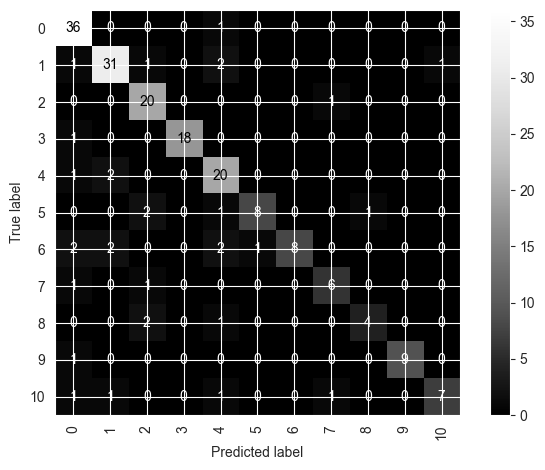

In [128]:
svm_sig = SVC(kernel="sigmoid")
y_pred = svm_sig.fit(list(x_vec_train), y_vec_train).predict(list(x_vec_test))

cmc = confusion_matrix(y_vec_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cmc)
disp.plot(xticks_rotation=90, cmap=plt.cm.Greys_r)

plt.tight_layout()

In [129]:
from sklearn.metrics import classification_report
print(classification_report(y_vec_test, y_pred))

                              precision    recall  f1-score   support

                        Arts       0.80      0.57      0.67         7
               Everyday life       1.00      0.53      0.70        15
                   Geography       1.00      0.95      0.97        19
Health, medicine and disease       0.88      0.64      0.74        11
                     History       0.89      0.67      0.76        12
                 Mathematics       1.00      0.90      0.95        10
                      People       0.77      0.95      0.85        21
     Philosophy and religion       0.75      0.75      0.75         8
                     Science       0.82      0.97      0.89        37
 Society and social sciences       0.86      0.86      0.86        36
                  Technology       0.71      0.87      0.78        23

                    accuracy                           0.84       199
                   macro avg       0.86      0.79      0.81       199
                we

# Conclusion:

# Multinomial Naive Bayes

In [130]:
df_vector.groupby(["Theme"]).count() / df_vector.count()

FeatureVector  Theme  WordVector
Theme                                                         
Arts                               0.045272    NaN    0.045272
Everyday life                      0.057344    NaN    0.057344
Geography                          0.105634    NaN    0.105634
Health, medicine and disease       0.041247    NaN    0.041247
History                            0.083501    NaN    0.083501
Mathematics                        0.045272    NaN    0.045272
People                             0.111670    NaN    0.111670
Philosophy and religion            0.055332    NaN    0.055332
Science                            0.209256    NaN    0.209256
Society and social sciences        0.146881    NaN    0.146881
Technology                         0.098592    NaN    0.098592

In [131]:
prior = [
0.045272,
0.057344,
0.105634,
0.041247,
0.083501,
0.045272,
0.11167,
0.055332,
0.209256,
0.14688,
0.098592
]

Without the prior

In [132]:
from sklearn.naive_bayes import MultinomialNB


mnb = MultinomialNB(alpha=0.0)
y_pred = mnb.fit(list(x_vec_train), y_vec_train).predict(list(x_vec_test))
train_score = mnb.score(list(x_vec_train), y_vec_train)
test_score = mnb.score(list(x_vec_test), y_vec_test)
size = x_vec_test.shape[0]
error = (y_vec_test != y_pred).sum()
print(f"Train Score: {train_score:.6f}\nTest  Score: {test_score:.6f}")
print(f"Number of mislabeled points out of a total {size} points : {error}")

Train Score: 0.989937
Test  Score: 0.623116
Number of mislabeled points out of a total 199 points : 75


C:\Users\Peter\OneDrive - Heriot-Watt University\HW\Semester\3\F21DL - ML\notebook\venv\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


With prior

In [133]:
mnb = MultinomialNB(alpha=0.0, class_prior=prior)
y_pred = mnb.fit(list(x_vec_train), y_vec_train).predict(list(x_vec_test))
train_score = mnb.score(list(x_vec_train), y_vec_train)
test_score = mnb.score(list(x_vec_test), y_vec_test)
size = x_vec_test.shape[0]
error = (y_vec_test != y_pred).sum()
print(f"Train Score: {train_score:.6f}\nTest  Score: {test_score:.6f}")
print(f"Number of mislabeled points out of a total {size} points : {error}")

C:\Users\Peter\OneDrive - Heriot-Watt University\HW\Semester\3\F21DL - ML\notebook\venv\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Train Score: 0.992453
Test  Score: 0.623116
Number of mislabeled points out of a total 199 points : 75


# Q2: How to calculate prior probabilities for our example?
As I understand, prior probability of P(A) = {desired outcomes / total number of outcomes} . I calculated prior for this dataset by {freq per class / dataframe size}, but applying it as a parameter to the model didn't make a difference. I assume for the prior I would have to get the total number of every wikipedia articles as total number of outcomes and the frequency of each theme, which would have been the desired outcomes. I.e. Total no of wiki articles are 100 000, number of science articles 36 000, thus the first element of the array would have been {36 000 / 100 000} -> 0.36
Since getting these numbers are a bit difficult, I assume that we don't need to use prior probability

In [134]:
y_vec_test.value_counts()

Science                         37
Society and social sciences     36
Technology                      23
People                          21
Geography                       19
Everyday life                   15
History                         12
Health, medicine and disease    11
Mathematics                     10
Philosophy and religion          8
Arts                             7
Name: Theme, dtype: int64

In [135]:
# Based on the freq of the true values
labels = [
"Science",
"Society and social sciences",
"People",
"Geography",
"Technology",
"History",
"Everyday life",
"Philosophy and religion",
"Arts",
"Mathematics",
"Health, medicine and disease",
]

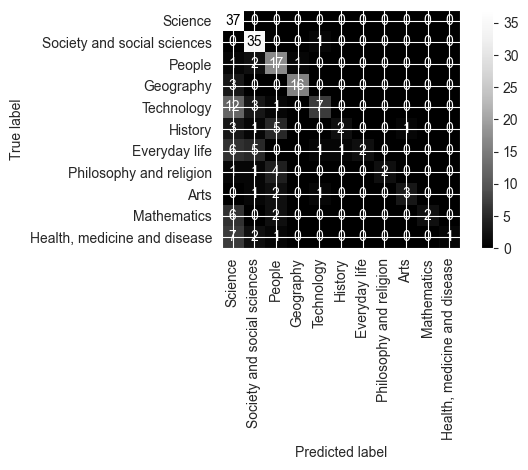

In [136]:
cmc = confusion_matrix(y_vec_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cmc, display_labels=labels)
disp.plot(xticks_rotation=90, cmap=plt.cm.Greys_r)

plt.tight_layout()

# Q3: Could you please check if the calculations are correct for the classification metrics?

## Classification metrics by hand
Where
- Sensitivity / Recall = TP / (TP + FN)
- Precision            = TP / (TP + FP)
- NPV                  = TN / (TN + FN)
- Specificity          = TN / (TN + FP)
- Accuracy             = TN + TP / Total

| Science                        |
|---------|----------|-----------|
| TP = 37 | FN = 0   |Sensitivity/Recall = 100%|
| FP = 39 | TN = 123 |Specificity = 75.92%|
| Precision(PPV) = 48.68% | NPV = 100%| Accuracy: 80.4% |

| Society and social sciences    |
|---------|----------|-----------|
| TP = 35 | FN =  1 |Sensitivity/Recall = 97.2%|
| FP = 15 | TN = 148|Specificity = 90.79%|
| Precision(PPV) = 70% | NPV = 99.32%| Accuracy: 91.96% |

| People                         |
|---------|----------|-----------|
| TP = 17  | FN = 4  |Sensitivity/Recall = 80.95%|
| FP = 15  | TN = 163 |Specificity = 91.57%|
| Precision(PPV) = 53.13% | NPV = 97.61%| Accuracy: 90.45% |

| Geography                      |
|---------|----------|-----------|
| TP = 16 | FN = 3   |Sensitivity/Recall = 84.21%|
| FP = 1  | TN = 179|Specificity = 99.44%|
| Precision(PPV) = 94.12% | NPV = 98.35%| Accuracy: 97.98% |

| Technology                     |
|---------|----------|-----------|
| TP =  7 | FN = 16  |Sensitivity/Recall = 30.43%|
| FP = 3  | TN = 173 |Specificity = 98.3%|
| Precision(PPV) = 70% | NPV = 91.53%| Accuracy: 90.45% |



### Classification report
[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [137]:
print(classification_report(y_vec_test, y_pred))

                              precision    recall  f1-score   support

                        Arts       0.75      0.43      0.55         7
               Everyday life       1.00      0.13      0.24        15
                   Geography       0.94      0.84      0.89        19
Health, medicine and disease       1.00      0.09      0.17        11
                     History       0.67      0.17      0.27        12
                 Mathematics       1.00      0.20      0.33        10
                      People       0.53      0.81      0.64        21
     Philosophy and religion       1.00      0.25      0.40         8
                     Science       0.49      1.00      0.65        37
 Society and social sciences       0.70      0.97      0.81        36
                  Technology       0.70      0.30      0.42        23

                    accuracy                           0.62       199
                   macro avg       0.80      0.47      0.49       199
                we

# Q4: Accuracy in sklearn.classification_report() is different from the one calculated by hand.
In sklearn's report the accuracy is 62% and it's only calculated once. Whereas, I calculated it for each category and they average around 90%. How is sklearn's calculation different from mine?


# Gaussian Naive Bayes

In [138]:
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
y_pred = gnb.fit(list(x_vec_train), y_vec_train).predict(list(x_vec_test))
train_score = gnb.score(list(x_vec_train), y_vec_train)
test_score = gnb.score(list(x_vec_test), y_vec_test)
size = x_vec_test.shape[0]
error = (y_vec_test != y_pred).sum()
print(f"Train Score: {train_score:.6f}\nTest  Score: {test_score:.6f}")
print(f"Number of mislabeled points out of a total {size} points : {error}")


Train Score: 1.000000
Test  Score: 0.623116
Number of mislabeled points out of a total 199 points : 75


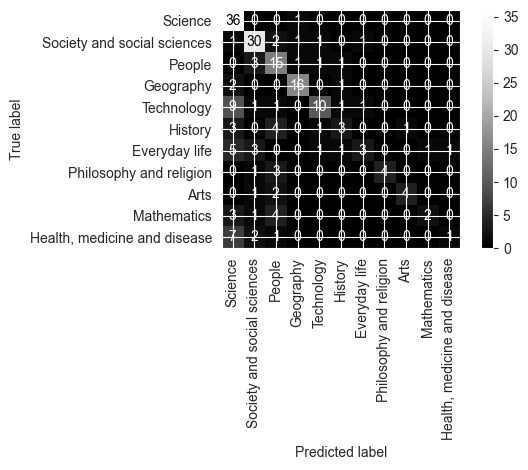

In [139]:
cmc = confusion_matrix(y_vec_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cmc, display_labels=labels)
disp.plot(xticks_rotation=90, cmap=plt.cm.Greys_r)

plt.tight_layout()

In [140]:
print(classification_report(y_vec_test, y_pred))

                              precision    recall  f1-score   support

                        Arts       0.80      0.57      0.67         7
               Everyday life       0.60      0.20      0.30        15
                   Geography       0.84      0.84      0.84        19
Health, medicine and disease       0.50      0.09      0.15        11
                     History       0.43      0.25      0.32        12
                 Mathematics       0.67      0.20      0.31        10
                      People       0.47      0.71      0.57        21
     Philosophy and religion       1.00      0.50      0.67         8
                     Science       0.55      0.97      0.70        37
 Society and social sciences       0.71      0.83      0.77        36
                  Technology       0.71      0.43      0.54        23

                    accuracy                           0.62       199
                   macro avg       0.66      0.51      0.53       199
                we

# Complement Naive Bayes

In [141]:
from sklearn.naive_bayes import ComplementNB

cnb = ComplementNB()
y_pred = cnb.fit(list(x_vec_train), y_vec_train).predict(list(x_vec_test))
train_score = cnb.score(list(x_vec_train), y_vec_train)
test_score = cnb.score(list(x_vec_test), y_vec_test)
size = x_vec_test.shape[0]
error = (y_vec_test != y_pred).sum()
print(f"Train Score: {train_score:.6f}\nTest  Score: {test_score:.6f}")
print(f"Number of mislabeled points out of a total {size} points : {error}")


Train Score: 0.815094
Test  Score: 0.673367
Number of mislabeled points out of a total 199 points : 65


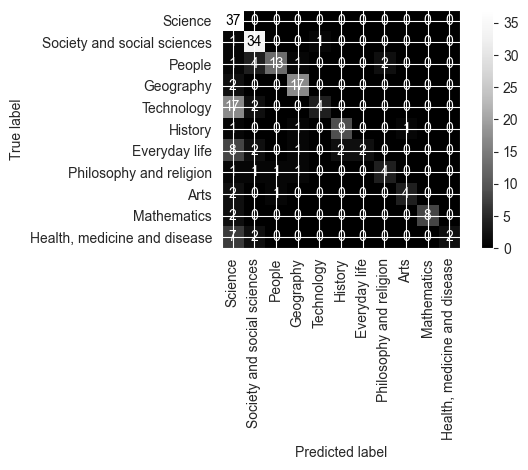

In [142]:
cmc = confusion_matrix(y_vec_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cmc, display_labels=labels)
disp.plot(xticks_rotation=90, cmap=plt.cm.Greys_r)

plt.tight_layout()

In [143]:
print(classification_report(y_vec_test, y_pred))

                              precision    recall  f1-score   support

                        Arts       0.80      0.57      0.67         7
               Everyday life       1.00      0.13      0.24        15
                   Geography       0.81      0.89      0.85        19
Health, medicine and disease       1.00      0.18      0.31        11
                     History       0.82      0.75      0.78        12
                 Mathematics       1.00      0.80      0.89        10
                      People       0.87      0.62      0.72        21
     Philosophy and religion       0.67      0.50      0.57         8
                     Science       0.47      1.00      0.64        37
 Society and social sciences       0.76      0.94      0.84        36
                  Technology       0.80      0.17      0.29        23

                    accuracy                           0.67       199
                   macro avg       0.82      0.60      0.62       199
                we

# Bernoulli Naive Bayes

In [144]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
y_pred = bnb.fit(list(x_vec_train), y_vec_train).predict(list(x_vec_test))
train_score = bnb.score(list(x_vec_train), y_vec_train)
test_score = bnb.score(list(x_vec_test), y_vec_test)
size = x_vec_test.shape[0]
error = (y_vec_test != y_pred).sum()
print(f"Train Score: {train_score:.6f}\nTest  Score: {test_score:.6f}")
print(f"Number of mislabeled points out of a total {size} points : {error}")

Train Score: 0.867925
Test  Score: 0.703518
Number of mislabeled points out of a total 199 points : 59


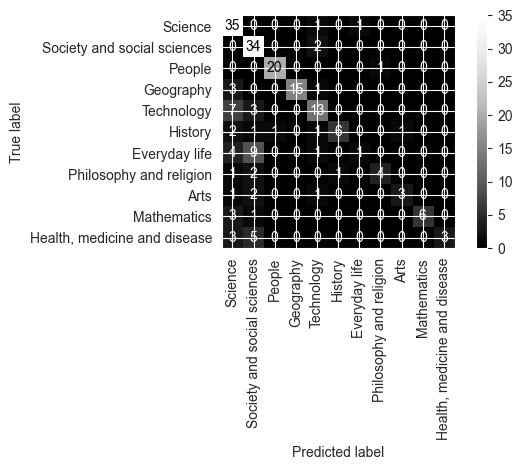

In [145]:
cmc = confusion_matrix(y_vec_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cmc, display_labels=labels)
disp.plot(xticks_rotation=90, cmap=plt.cm.Greys_r)

plt.tight_layout()

In [146]:
print(classification_report(y_vec_test, y_pred))

                              precision    recall  f1-score   support

                        Arts       0.75      0.43      0.55         7
               Everyday life       0.50      0.07      0.12        15
                   Geography       1.00      0.79      0.88        19
Health, medicine and disease       1.00      0.27      0.43        11
                     History       0.86      0.50      0.63        12
                 Mathematics       1.00      0.60      0.75        10
                      People       0.95      0.95      0.95        21
     Philosophy and religion       0.80      0.50      0.62         8
                     Science       0.59      0.95      0.73        37
 Society and social sciences       0.60      0.94      0.73        36
                  Technology       0.65      0.57      0.60        23

                    accuracy                           0.70       199
                   macro avg       0.79      0.60      0.64       199
                we

# Categorical Naive Bayes
# Q5: I am clearly missing something here but I don't see what...
The results are not incomprehensible. I did transform the labels of the categories as the documentation suggest, but it actually got worse.

### Data preparation.
Creating numerical categories. I.e. From Technology --> 10

In [147]:
y_vec_numerical_train = y_vec_train.copy()
y_vec_numerical_test = y_vec_test.copy()
y_vec_numerical_train.head(20)

Wheel                                       Technology
Hatshepsut                                      People
Electromagnetism                               Science
Gender                                   Everyday life
Confucianism                   Philosophy and religion
Computer science                            Technology
Religion                       Philosophy and religion
Arithmetic                                 Mathematics
China                                        Geography
Charlie Chaplin                                 People
Integrated circuit                          Technology
NATO                       Society and social sciences
Murasaki Shikibu                                People
Wolfgang Amadeus Mozart                         People
Refrigeration                               Technology
Mansa Musa                                      People
Amazon rainforest                            Geography
Marco Polo                                      People
Rock music

In [148]:
y_vec_numerical_train = y_vec_numerical_train.map(mapping)
y_vec_numerical_test = y_vec_numerical_test.map(mapping)
y_vec_numerical_train.head(20)

Wheel                      10
Hatshepsut                  6
Electromagnetism            8
Gender                      1
Confucianism                7
Computer science           10
Religion                    7
Arithmetic                  5
China                       2
Charlie Chaplin             6
Integrated circuit         10
NATO                        9
Murasaki Shikibu            6
Wolfgang Amadeus Mozart     6
Refrigeration              10
Mansa Musa                  6
Amazon rainforest           2
Marco Polo                  6
Rock music                  0
Charlemagne                 6
Name: Theme, dtype: int64

In [149]:
from sklearn.naive_bayes import CategoricalNB


catnb = CategoricalNB ()
y_pred = catnb.fit(list(x_vec_train), y_vec_numerical_train).predict(list(x_vec_test))
train_score = catnb.score(list(x_vec_train), y_vec_numerical_train)
test_score = catnb.score(list(x_vec_test), y_vec_numerical_test)
size = x_vec_test.shape[0]
error = (y_vec_numerical_test != y_pred).sum()
print(f"Train Score: {train_score:.6f}\nTest  Score: {test_score:.6f}")
print(f"Number of mislabeled points out of a total {size} points : {error}")

Train Score: 0.215094
Test  Score: 0.185930
Number of mislabeled points out of a total 199 points : 162


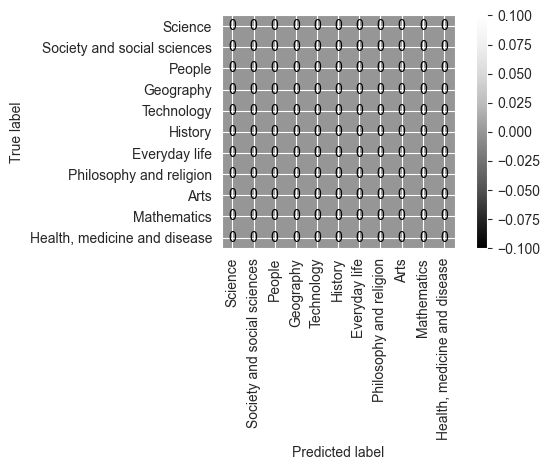

In [150]:
cmc = confusion_matrix(y_vec_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cmc, display_labels=labels)
disp.plot(xticks_rotation=90, cmap=plt.cm.Greys_r)

plt.tight_layout()

In [151]:
print(classification_report(y_vec_numerical_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        21
           7       0.00      0.00      0.00         8
           8       0.19      1.00      0.31        37
           9       0.00      0.00      0.00        36
          10       0.00      0.00      0.00        23

    accuracy                           0.19       199
   macro avg       0.02      0.09      0.03       199
weighted avg       0.03      0.19      0.06       199



C:\Users\Peter\OneDrive - Heriot-Watt University\HW\Semester\3\F21DL - ML\notebook\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Peter\OneDrive - Heriot-Watt University\HW\Semester\3\F21DL - ML\notebook\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Peter\OneDrive - Heriot-Watt University\HW\Semester\3\F21DL - ML\notebook\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with

# Q6: In the lab sheet the table has a separate column for Sensitivity and Recall. Is that correct?
As I understood, these two terms are the same.

# Conclusion:

Note:
- For precision and recall the weighted average was taken
- Number of misslabels are the number of incorrectly labeled data.

| Model       | Precision | Recall | Accuracy | No. of mislabels |
|-------------|-----------|--------|----------|------------------|
| MNB         | 0.73      | 0.62   | 0.62     | 75               |
| Gaus        | 0.64      | 0.62   | 0.62     | 75               |
| Compelement | 0.77      | 0.67   | 0.67     | 65               |
| Bernoulli   | 0.74      | 0.7    | 0.7      | 59               |
| Categorical | 0.03      | 0.19   | 0.19     | 162              |
| + Sigmoid   | 0.85      | 0.86   | 0.84     | 32               |


The Sigmoid for Support Vector Machine was added to the end of the table as this scored the best out of every model.
The values for Categorical Naive Bayes are not that relevant due to the issue described above in the Categorical Naive Bayes paragraph.
Overall, the Bernoulli  had the best results out of the Naive Bayes alrgorithms. The number of mislabels is the lowest for the Bernoulli and this had the highest accuracy. This finding was a bit controversial for me. This classification algorithms binarizes the parameters of the features. I.e. From a word vector of `[0, 0, 0.32, 0, 0.16 .... 0.16]` it went to -> `[0, 0, 1, 0, 1 .... 1]`. This way the depth of information is lost and reduced just to `0` and `1`. Since information is lost I expected that the algorithm will act poorly. However, I believe that these results for MNB, Gaus and Complement could have been improved if I play around with the hyper parameters.

From the other hand SVM with a Sigmoid kernel had a good score.